See code at https://github.com/google-research/vision_transformer/

This Colab is about the paper

- LiT: Zero-Shot Transfer with Locked-image text Tuning: https://arxiv.org/abs/2111.07991

For ViT, MLP Mixer etc see the other Colab

https://colab.research.google.com/github/google-research/vision_transformer/blob/main/vit_jax.ipynb

## My model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/TFG/trained_models/latest_13_08_2022.h5')
model.summary()

Model: "face_descriptor_by_rebeca"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 218, 218, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_140 (Conv2D)            (None, 218, 218, 32  896         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 activation_106 (Activation)    (None, 218, 218, 32  0           ['conv2d_140[0][0]']             
                                )                                         

In [ ]:
from tensorflow.keras.optimizers import Adam
init_lr = 1e-4
epochs = 100
opt = Adam(lr=init_lr, decay=init_lr / epochs)
model.compile(optimizer=opt, 
              loss={
                  'age_output': 'categorical_crossentropy', 
                  'expression_output': 'categorical_crossentropy', 
                  'gender_output': 'binary_crossentropy',
                  'hair_output': 'categorical_crossentropy',
                  'eyeglasses_output': 'binary_crossentropy',
                  'bald_output': 'binary_crossentropy'},
              loss_weights={
                  'age_output': 1, 
                  'expression_output': 1, 
                  'gender_output': 0.5,
                  'hair_output': 1,
                  'eyeglasses_output': 0.5,
                  'bald_output': 0.5},
              metrics={
                  'age_output': 'accuracy', 
                  'expression_output': 'accuracy',
                  'gender_output': 'accuracy',
                  'hair_output': 'accuracy',
                  'eyeglasses_output': 'accuracy',                  
                  'bald_output': 'accuracy'})

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
'''age_branch = self.build_age_branch(inputs)
expression_branch = self.build_expression_branch(inputs, num_facial_expressions)
gender_branch = self.build_gender_branch(inputs)
hair_branch = self.build_hair_branch(inputs, 4)
bald_branch = self.build_bald_branch(inputs)
eyeglasses_branch = self.build_eyeglasses_branch(inputs)'''
dataset_dict = {
    'age_id': {
        0: '0-15',
        1: '15-20',
        2: '20-35',  
        3: '35-45', 
        4: '45-55', 
        5: '55-65',
        6: '>65'
    },
    # 'angry', 'fear_surprise', 'happy', 'neutral', 'sad', 
    'expression_id': {
        0: 'angry',  
        1: 'fear_surprise', 
        2: 'happy', 
        3: 'neutral',
        4: 'sad'
    },
    'gender_id': {
        0: "Hombre",
        1: "Mujer"
    },
    'hair_id': {
        0: 'Black_Hair',
        1: 'Blond_Hair',
        2: 'Brown_Hair',
        3: 'Gray_Hair',
    },
    'bald_id': {
        0: "NO calv@",
        1: "Calv@"
    },
    'eyeglasses_id': {
        0: "Sin gafas",
        1: "Con gafas"
    }
}

In [ ]:
!pip install MTCNN

from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN
import tensorflow as tf
#from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as pl

WIDTH, HEIGHT = 218, 218
# extract a single face from a given photograph
def extract_face(filename, required_size=(WIDTH, HEIGHT), detector= MTCNN()):
  # load image from file
  image = Image.open(filename)
  #image = Image.fromarray(image)
  # convert to RGB, if needed
  image = image.convert('RGB')
  # convert to array
  pixels = asarray(image)
  # create the detector, using default weights
  
  # detect faces in the image
  results = detector.detect_faces(pixels)
  # extract the bounding box from the first face
  try:
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face

    '''face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    plt.imshow(image)
    plt.show()'''

    face = pixels[y1-15:y2, x1-10:x2+10]
    # resize pixels to the model size
    image = Image.fromarray(face)

    

    
    image = image.resize(required_size, Image.ANTIALIAS)
    
    #plt.imshow(image)
    #plt.show()
    #print(width, height)
    face_array = asarray(image)
    #plt.imshow(face_array)
    #plt.show()
    return face_array
  except ValueError as e:
    print(e)
    print("File: "+ filename)
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size, Image.ANTIALIAS)
    
    image = image.resize(required_size, Image.ANTIALIAS)
    face_array = asarray(image)
    print("Returning face extracted without margin: "+ filename)
    print()
    return face_array
  except IndexError as e:
    print(e)
    print("File: "+ filename)
    image = Image.open(filename)
    #image = Image.fromarray(image)
    # convert to RGB, if needed
    image = image.convert('RGB')
    image = image.resize(required_size, Image.ANTIALIAS)
    
    # convert to array
    pixels = asarray(image)
    #plt.plot(pixels)
    #plt.show()
    print("Returning the whole image: "+ filename)
    print()
    return pixels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 8.8 MB/s 


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
detector= MTCNN()
face_extracted = extract_face("/content/drive/MyDrive/TFG/fotos/hombre.jpg", required_size=(WIDTH, HEIGHT), detector=detector) 

In [ ]:
face_extracted.shape

(218, 218, 3)

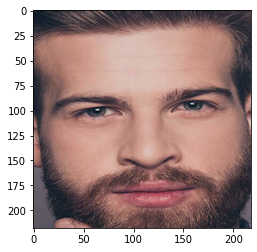

In [ ]:
plt.imshow(face_extracted)
plt.show()

In [ ]:
# predicting images
from keras.preprocessing import image as imagek
#x = imagek.img_to_array(face_extracted)
x = np.expand_dims(face_extracted, axis=0)

In [ ]:
x.shape

(1, 218, 218, 3)

In [ ]:
images = np.vstack([x])
pred = model.predict(images, batch_size=10)
print(pred)

[array([[2.6055846e-05, 4.8866414e-04, 3.0898931e-02, 9.5783621e-01,
        9.0076448e-03, 1.1386893e-03, 6.0374517e-04]], dtype=float32), array([[0.18926574, 0.14301038, 0.02210195, 0.36745998, 0.27816197]],
      dtype=float32), array([[0.99663687, 0.00607178]], dtype=float32), array([[0.14751205, 0.09658098, 0.6686517 , 0.08725529]], dtype=float32), array([[0.9842868 , 0.00757226]], dtype=float32), array([[9.995341e-01, 7.061362e-04]], dtype=float32)]


In [ ]:
for i, k in enumerate(dataset_dict.keys()):
  print(k)
  print(dataset_dict[k][pred[i].argmax(axis=1)[0]])
  print()

age_id
35-45

expression_id
neutral

gender_id
Hombre

hair_id
Brown_Hair

bald_id
NO calv@

eyeglasses_id
Sin gafas



In [ ]:
import os
detector= MTCNN()

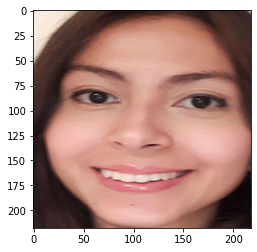

age_id: 35-45   expression_id: happy   gender_id: Mujer   hair_id: Brown_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[7.3580195e-05, 1.3436605e-03, 1.1537007e-02, 8.3326262e-01,
        1.5003552e-01, 2.4877407e-03, 1.2598669e-03]], dtype=float32), array([[5.0779287e-04, 7.6956618e-05, 9.9911577e-01, 1.9768420e-04,
        1.0166105e-04]], dtype=float32), array([[8.049168e-05, 9.999580e-01]], dtype=float32), array([[6.7264155e-02, 4.1027494e-02, 8.9137453e-01, 3.3383933e-04]],
      dtype=float32), array([[0.99646145, 0.00261247]], dtype=float32), array([[9.9999654e-01, 8.7287981e-06]], dtype=float32)]





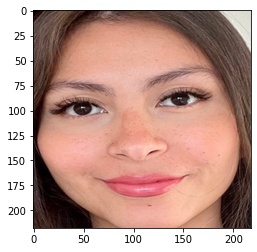

age_id: 35-45   expression_id: happy   gender_id: Mujer   hair_id: Brown_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[7.6512719e-05, 8.0569088e-04, 4.4233352e-03, 8.1483030e-01,
        1.7500484e-01, 2.6464427e-03, 2.2128343e-03]], dtype=float32), array([[0.02193815, 0.00210395, 0.92553777, 0.04104158, 0.00937866]],
      dtype=float32), array([[1.2038528e-07, 1.0000000e+00]], dtype=float32), array([[1.5904161e-04, 2.2531932e-02, 9.7329664e-01, 4.0124413e-03]],
      dtype=float32), array([[0.9977305 , 0.00330806]], dtype=float32), array([[9.9998087e-01, 3.1410957e-05]], dtype=float32)]





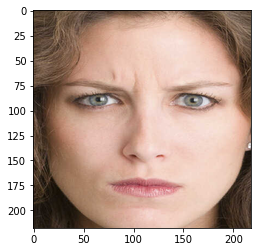

age_id: 35-45   expression_id: neutral   gender_id: Mujer   hair_id: Blond_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[5.3966069e-05, 7.1587751e-04, 1.0998322e-02, 9.6151823e-01,
        2.3567157e-02, 1.8025861e-03, 1.3438978e-03]], dtype=float32), array([[0.21324134, 0.24642378, 0.03045262, 0.26963273, 0.2402495 ]],
      dtype=float32), array([[0.00322139, 0.99769706]], dtype=float32), array([[4.1955968e-06, 7.0737064e-01, 2.9227680e-01, 3.4836729e-04]],
      dtype=float32), array([[0.99647385, 0.00213885]], dtype=float32), array([[9.9999952e-01, 6.7004345e-07]], dtype=float32)]





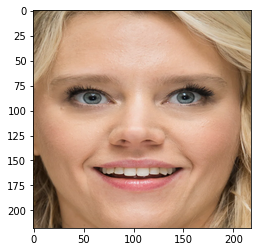

age_id: 35-45   expression_id: happy   gender_id: Mujer   hair_id: Blond_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[2.0491378e-05, 1.6894411e-04, 1.5399164e-01, 8.4090883e-01,
        3.9130417e-03, 4.8065593e-04, 5.1633734e-04]], dtype=float32), array([[1.5513193e-03, 1.8881356e-04, 9.9719763e-01, 7.4423180e-04,
        3.1801133e-04]], dtype=float32), array([[2.0755235e-07, 9.9999988e-01]], dtype=float32), array([[7.5137607e-13, 1.0000000e+00, 8.5678277e-11, 1.3760557e-08]],
      dtype=float32), array([[9.987190e-01, 9.454787e-04]], dtype=float32), array([[9.9999940e-01, 7.3079406e-07]], dtype=float32)]





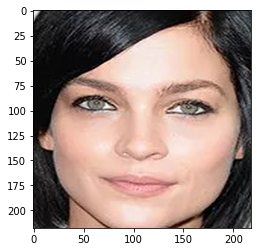

age_id: 35-45   expression_id: neutral   gender_id: Mujer   hair_id: Black_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[1.3965924e-04, 1.1235895e-03, 2.7993527e-01, 6.8587136e-01,
        3.0580822e-02, 1.4250480e-03, 9.2435669e-04]], dtype=float32), array([[0.11635985, 0.07832465, 0.33277014, 0.34553817, 0.12700726]],
      dtype=float32), array([[3.9317483e-06, 9.9999481e-01]], dtype=float32), array([[9.9977404e-01, 9.2975861e-05, 1.3296388e-04, 4.3534346e-08]],
      dtype=float32), array([[9.9999791e-01, 1.5643099e-06]], dtype=float32), array([[9.9999857e-01, 2.0617406e-06]], dtype=float32)]





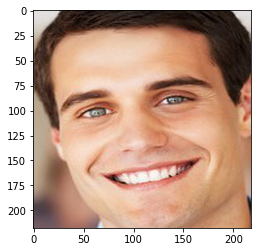

age_id: 20-35   expression_id: happy   gender_id: Hombre   hair_id: Black_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[4.7875536e-05, 1.8389439e-03, 9.4241476e-01, 5.2948330e-02,
        2.3967179e-03, 8.6287640e-05, 2.6700360e-04]], dtype=float32), array([[5.1175635e-03, 4.6780214e-04, 9.8938423e-01, 3.8213611e-03,
        1.2090219e-03]], dtype=float32), array([[0.9959845 , 0.00836614]], dtype=float32), array([[9.8533034e-01, 3.5807610e-04, 1.4296515e-02, 1.5112748e-05]],
      dtype=float32), array([[9.996195e-01, 7.087290e-04]], dtype=float32), array([[9.9987471e-01, 1.9052625e-04]], dtype=float32)]





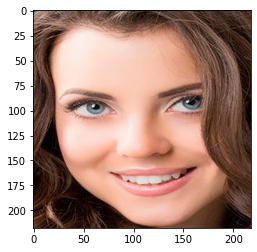

age_id: 20-35   expression_id: happy   gender_id: Mujer   hair_id: Brown_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[7.3758883e-06, 6.7055997e-05, 9.1755086e-01, 8.1963547e-02,
        2.7761774e-04, 1.6653046e-05, 1.1694427e-04]], dtype=float32), array([[2.8489679e-03, 3.0949258e-04, 9.9464273e-01, 1.5909881e-03,
        6.0780178e-04]], dtype=float32), array([[1.0234959e-07, 1.0000000e+00]], dtype=float32), array([[1.3222167e-05, 1.8721456e-02, 9.8120648e-01, 5.8858714e-05]],
      dtype=float32), array([[9.99978960e-01, 1.49872785e-05]], dtype=float32), array([[9.9999970e-01, 4.1257863e-07]], dtype=float32)]





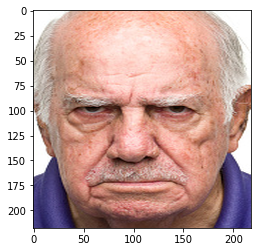

age_id: 45-55   expression_id: neutral   gender_id: Hombre   hair_id: Gray_Hair   bald_id: Calv@   eyeglasses_id: Sin gafas   

[array([[0.00212036, 0.0016588 , 0.04053545, 0.155042  , 0.42461488,
        0.36799964, 0.00802893]], dtype=float32), array([[0.20960458, 0.13793346, 0.01264415, 0.35510072, 0.28471714]],
      dtype=float32), array([[1.000000e+00, 3.932839e-08]], dtype=float32), array([[3.5369974e-06, 1.2186546e-04, 7.0689602e-08, 9.9987447e-01]],
      dtype=float32), array([[0.08258641, 0.8968165 ]], dtype=float32), array([[0.996927  , 0.00337282]], dtype=float32)]





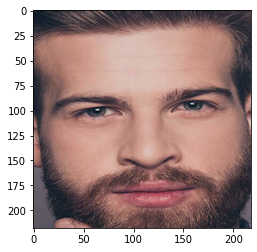

age_id: 35-45   expression_id: neutral   gender_id: Hombre   hair_id: Brown_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[2.6055846e-05, 4.8866414e-04, 3.0898931e-02, 9.5783621e-01,
        9.0076448e-03, 1.1386893e-03, 6.0374517e-04]], dtype=float32), array([[0.18926574, 0.14301038, 0.02210195, 0.36745998, 0.27816197]],
      dtype=float32), array([[0.99663687, 0.00607178]], dtype=float32), array([[0.14751205, 0.09658098, 0.6686517 , 0.08725529]], dtype=float32), array([[0.9842868 , 0.00757226]], dtype=float32), array([[9.995341e-01, 7.061362e-04]], dtype=float32)]





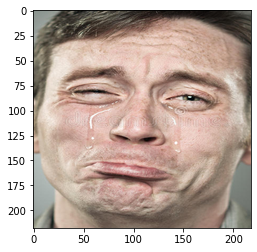

age_id: 20-35   expression_id: neutral   gender_id: Hombre   hair_id: Gray_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[8.9202949e-08, 6.9352876e-07, 9.9996531e-01, 1.7389304e-05,
        1.0458913e-05, 4.3013401e-06, 1.6127702e-06]], dtype=float32), array([[0.24240488, 0.20412534, 0.0163634 , 0.28563413, 0.2514723 ]],
      dtype=float32), array([[9.9999881e-01, 1.9428385e-06]], dtype=float32), array([[1.0731651e-04, 2.8226301e-03, 8.2617980e-06, 9.9706179e-01]],
      dtype=float32), array([[0.96290326, 0.02438313]], dtype=float32), array([[0.9841667 , 0.01048848]], dtype=float32)]





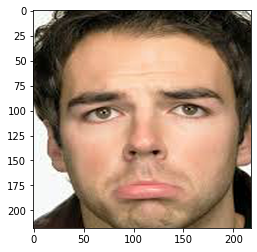

age_id: 20-35   expression_id: neutral   gender_id: Hombre   hair_id: Black_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[8.0263235e-06, 1.5437444e-04, 9.9374664e-01, 5.9023849e-03,
        8.7628512e-05, 2.5431696e-05, 7.5505355e-05]], dtype=float32), array([[0.25694656, 0.1336421 , 0.00566191, 0.33538216, 0.26836723]],
      dtype=float32), array([[9.9999166e-01, 1.8661098e-05]], dtype=float32), array([[9.99878049e-01, 7.22618779e-06, 1.13467424e-04, 1.19498645e-06]],
      dtype=float32), array([[9.9998045e-01, 1.2591317e-05]], dtype=float32), array([[9.999989e-01, 2.440461e-06]], dtype=float32)]





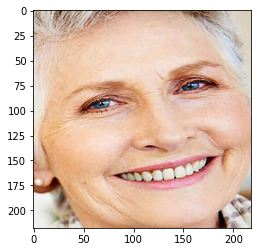

age_id: 35-45   expression_id: happy   gender_id: Mujer   hair_id: Blond_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[2.8164726e-07, 2.3364906e-05, 1.8901018e-03, 9.9792862e-01,
        1.0139646e-04, 1.0011976e-05, 4.6300738e-05]], dtype=float32), array([[2.3056690e-03, 2.6669729e-04, 9.9575609e-01, 1.1840463e-03,
        4.8739937e-04]], dtype=float32), array([[2.6049638e-05, 9.9996686e-01]], dtype=float32), array([[5.0215789e-08, 9.5859379e-01, 1.0963013e-07, 4.1406095e-02]],
      dtype=float32), array([[0.99869776, 0.00233507]], dtype=float32), array([[9.9991703e-01, 9.0687747e-05]], dtype=float32)]





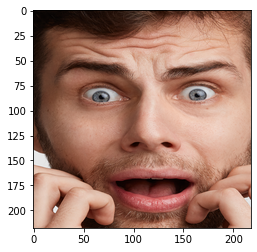

age_id: 35-45   expression_id: neutral   gender_id: Hombre   hair_id: Blond_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[1.3663131e-04, 8.5864204e-04, 1.2834541e-01, 8.6157340e-01,
        6.4134281e-03, 1.1547860e-03, 1.5176964e-03]], dtype=float32), array([[0.19232096, 0.17839615, 0.03748772, 0.32724598, 0.26454917]],
      dtype=float32), array([[0.9874295, 0.012155 ]], dtype=float32), array([[0.00098889, 0.6618618 , 0.33645973, 0.00068956]], dtype=float32), array([[1.0000000e+00, 5.8757696e-09]], dtype=float32), array([[1.0000000e+00, 1.4431534e-08]], dtype=float32)]





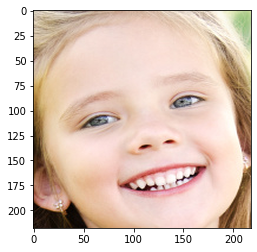

age_id: 35-45   expression_id: happy   gender_id: Mujer   hair_id: Blond_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[0.00158703, 0.00390277, 0.16139005, 0.8100834 , 0.00644514,
        0.00659649, 0.00999509]], dtype=float32), array([[8.612010e-03, 7.401391e-04, 9.793214e-01, 8.846039e-03,
        2.480293e-03]], dtype=float32), array([[2.0410191e-06, 9.9999833e-01]], dtype=float32), array([[2.1325668e-10, 9.9995756e-01, 7.6227434e-07, 4.1762778e-05]],
      dtype=float32), array([[9.9997902e-01, 2.8580778e-05]], dtype=float32), array([[9.9999869e-01, 1.1806577e-06]], dtype=float32)]





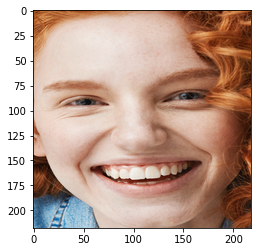

age_id: 35-45   expression_id: happy   gender_id: Mujer   hair_id: Blond_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[6.6946028e-05, 2.8317443e-05, 1.6973445e-02, 9.8036271e-01,
        1.7169035e-03, 3.8569811e-04, 4.6598518e-04]], dtype=float32), array([[3.1667275e-03, 3.7696285e-04, 9.9404186e-01, 1.7299772e-03,
        6.8444212e-04]], dtype=float32), array([[0.00441682, 0.9972219 ]], dtype=float32), array([[2.5902875e-05, 8.6594445e-01, 7.7200576e-04, 1.3325764e-01]],
      dtype=float32), array([[0.99792325, 0.00366151]], dtype=float32), array([[9.9997914e-01, 1.7207532e-05]], dtype=float32)]





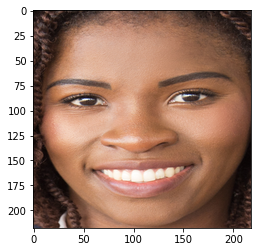

age_id: 35-45   expression_id: happy   gender_id: Mujer   hair_id: Brown_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[4.9613642e-05, 1.7463219e-04, 8.7701857e-02, 9.0569061e-01,
        5.0042197e-03, 5.5658701e-04, 8.2249520e-04]], dtype=float32), array([[0.10049187, 0.05208816, 0.42203167, 0.32557908, 0.09980923]],
      dtype=float32), array([[4.1061640e-04, 9.9981743e-01]], dtype=float32), array([[0.2604335 , 0.30012158, 0.4227898 , 0.01665511]], dtype=float32), array([[9.99878705e-01, 1.18426644e-04]], dtype=float32), array([[9.9969876e-01, 3.6844611e-04]], dtype=float32)]





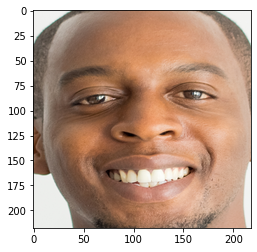

age_id: 35-45   expression_id: happy   gender_id: Hombre   hair_id: Gray_Hair   bald_id: Calv@   eyeglasses_id: Sin gafas   

[array([[0.00069829, 0.00137718, 0.25310034, 0.6926603 , 0.04404911,
        0.00201844, 0.00609634]], dtype=float32), array([[0.04893802, 0.00888505, 0.7275572 , 0.17767209, 0.03694762]],
      dtype=float32), array([[0.99644804, 0.00276315]], dtype=float32), array([[2.7798214e-06, 4.4040689e-06, 6.5692817e-08, 9.9999273e-01]],
      dtype=float32), array([[0.29748946, 0.74327105]], dtype=float32), array([[0.9922967 , 0.01011112]], dtype=float32)]





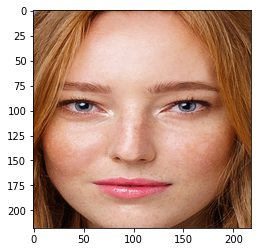

age_id: 20-35   expression_id: neutral   gender_id: Mujer   hair_id: Blond_Hair   bald_id: NO calv@   eyeglasses_id: Sin gafas   

[array([[0.00088592, 0.0017876 , 0.838268  , 0.12032162, 0.02440996,
        0.00226737, 0.0120596 ]], dtype=float32), array([[0.1238653 , 0.08855582, 0.24608661, 0.37488565, 0.16660659]],
      dtype=float32), array([[5.5776358e-08, 1.0000000e+00]], dtype=float32), array([[9.2562900e-09, 9.9999475e-01, 8.7525132e-07, 4.3884311e-06]],
      dtype=float32), array([[9.9975395e-01, 2.0286441e-04]], dtype=float32), array([[9.9972558e-01, 4.0397048e-04]], dtype=float32)]





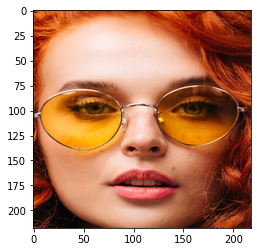

age_id: 45-55   expression_id: angry   gender_id: Hombre   hair_id: Blond_Hair   bald_id: Calv@   eyeglasses_id: Con gafas   

[array([[5.0697383e-04, 8.8502077e-04, 4.0384470e-03, 1.5654233e-01,
        8.0038476e-01, 2.8160775e-02, 9.4817262e-03]], dtype=float32), array([[0.2824219 , 0.22005671, 0.00935771, 0.24850062, 0.23966305]],
      dtype=float32), array([[0.9303028 , 0.07384044]], dtype=float32), array([[0.00267412, 0.66661996, 0.0043068 , 0.32639912]], dtype=float32), array([[3.3524632e-04, 9.9962175e-01]], dtype=float32), array([[8.504391e-04, 9.992515e-01]], dtype=float32)]





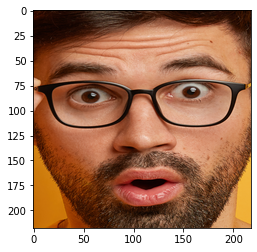

age_id: 35-45   expression_id: neutral   gender_id: Hombre   hair_id: Black_Hair   bald_id: Calv@   eyeglasses_id: Con gafas   

[array([[2.4374771e-04, 3.9406194e-04, 2.3675203e-02, 9.6846372e-01,
        4.6592643e-03, 1.9113076e-03, 6.5276446e-04]], dtype=float32), array([[0.12994199, 0.07983438, 0.06001409, 0.4773525 , 0.25285706]],
      dtype=float32), array([[9.9999756e-01, 2.9585842e-06]], dtype=float32), array([[7.4647951e-01, 2.1134537e-01, 4.2107850e-02, 6.7322100e-05]],
      dtype=float32), array([[0.00510964, 0.99814343]], dtype=float32), array([[0.12271503, 0.91953516]], dtype=float32)]


In [ ]:
path = "/content/drive/MyDrive/TFG/fotos"
for file in os.listdir(path):
  print("\n\n")
  face_extracted = extract_face(path+"/"+file, required_size=(WIDTH, HEIGHT), detector=detector) 
  plt.imshow(face_extracted)
  plt.show()
  x = np.expand_dims(face_extracted, axis=0)
  images = np.vstack([x])
  pred = model.predict(images, batch_size=10)
  out_text=''
  for i, k in enumerate(dataset_dict.keys()):
    out_text += str(k)+": "+str(dataset_dict[k][pred[i].argmax(axis=1)[0]])+ "   "
  print(out_text)
  print()
  print(pred)

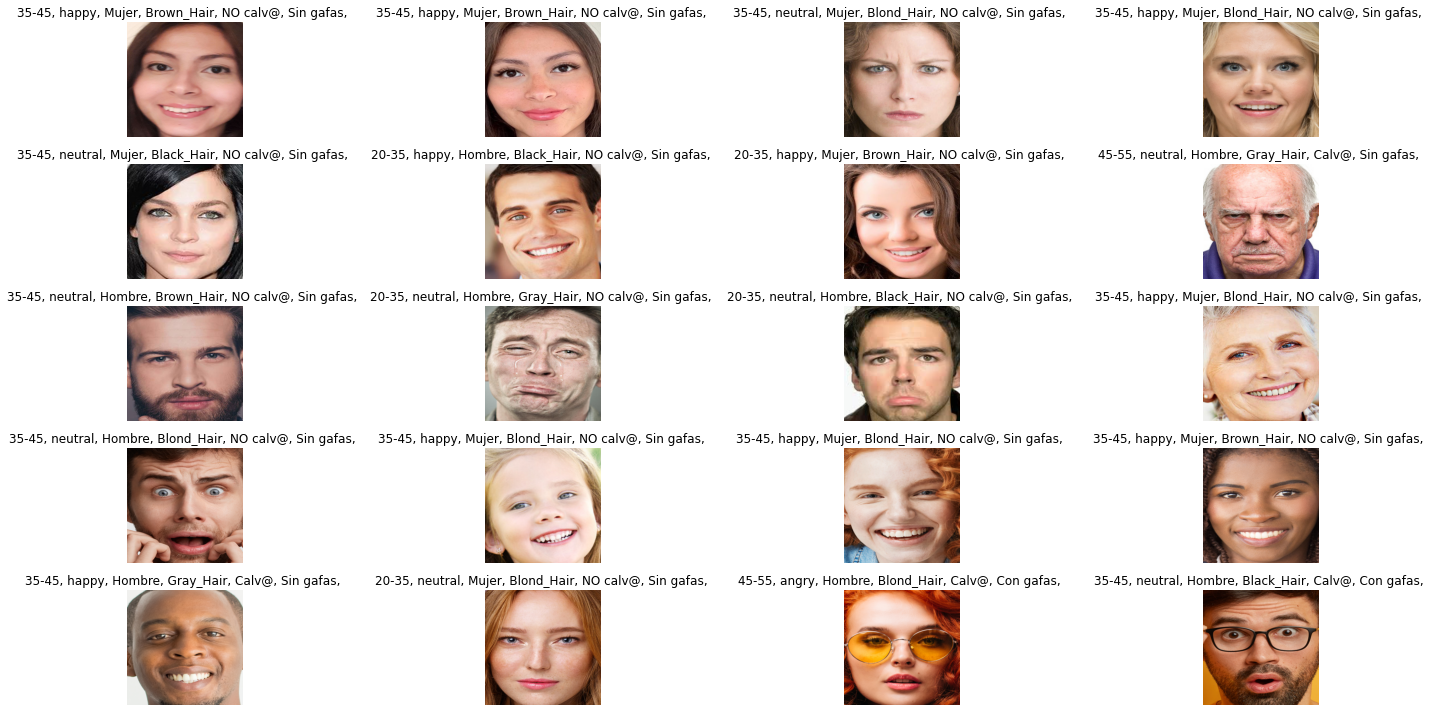

In [ ]:

index=0
figsize = (20,10)
fig = plt.figure(figsize=figsize)
for file in os.listdir(path):
    rows = 5
    cols=4
    face_extracted = extract_face(path+"/"+file, required_size=(WIDTH, HEIGHT), detector=detector) 
    x = np.expand_dims(face_extracted, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    out_text=''
    for i, k in enumerate(dataset_dict.keys()):
      out_text += str(dataset_dict[k][pred[i].argmax(axis=1)[0]])+ ", "
    #print(out_text)
    #print()
    #print(pred)

    plt.subplot(rows,cols,index+1)
    plt.axis('off')
    plt.title(str(out_text))
    plt.imshow(face_extracted) 
    plt.tight_layout()
    index=index+1

In [ ]:
# ... and use most similar embedding to predict label.
(sims.argmax(axis=1) == np.array(labels)).mean()
# Expected accuracy for model "LiT-B16B" : 79.19

DeviceArray(0.79219997, dtype=float32)

## Load model

In [ ]:
# Installs the vit_jax package from Github.
!pip install -q git+https://github.com/google-research/vision_transformer

     |████████████████████████████████| 92 kB 872 kB/s 
     |████████████████████████████████| 202 kB 22.3 MB/s 
     |████████████████████████████████| 77 kB 7.2 MB/s 
     |████████████████████████████████| 4.6 MB 40.0 MB/s 
     |████████████████████████████████| 76 kB 5.7 MB/s 
     |████████████████████████████████| 346 kB 58.9 MB/s 
     |████████████████████████████████| 7.5 MB 26.6 MB/s 
     |████████████████████████████████| 217 kB 52.1 MB/s 
     |████████████████████████████████| 145 kB 30.7 MB/s 
     |████████████████████████████████| 596 kB 26.6 MB/s 
     |████████████████████████████████| 51 kB 8.2 MB/s 
     |████████████████████████████████| 511.7 MB 5.1 kB/s 
     |████████████████████████████████| 511.7 MB 4.4 kB/s 
     |████████████████████████████████| 4.9 MB 45.6 MB/s 


In [ ]:
import jax
import jax.numpy as jnp
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import tqdm

from vit_jax import models


In [ ]:
# Currently available LiT models
[name for name in models.model_configs.MODEL_CONFIGS if name.startswith('LiT')]

['LiT-B16B', 'LiT-L16L', 'LiT-L16S', 'LiT-L16Ti']

In [ ]:
model_name = 'LiT-B16B'

lit_model = models.get_model(model_name)
# Loading the variables from cloud can take a while the first time...
lit_variables = lit_model.load_variables()
# Creating tokens from freeform text (see next section).
tokenizer = lit_model.get_tokenizer()
# Resizing images & converting value range to -1..1 (see next section).
image_preprocessing = lit_model.get_image_preprocessing()
# Preprocessing op for use in tfds pipeline (see last section).
pp = lit_model.get_pp()

Loading params from cloud: gs://vit_models/lit/LiT-B16B.npz


100%|██████████| 75/75 [01:36<00:00,  1.28s/it]



⚠️ Reusing local copy: LiT-B16B.npz


## Use model

In [ ]:
# Let's load some sample images from tfds.
# Alternatively you can also load these images from the internet / your Drive.
ds = tfds.load('imagenette', split='train')
images_list = [
    example['image'].numpy()
    for _, example in zip(range(5), ds)
]
# Note that this is a list of images with different shapes, not a four
# dimensional tensor.
[image.shape for image in images_list]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/9469 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imagenette/full-size-v2/1.0.0.incompleteI4VLW9/imagenette-train.tfrecord*...: …

Generating validation examples...:   0%|          | 0/3925 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imagenette/full-size-v2/1.0.0.incompleteI4VLW9/imagenette-validation.tfrecord*…

Dataset imagenette downloaded and prepared to ~/tensorflow_datasets/imagenette/full-size-v2/1.0.0. Subsequent calls will reuse this data.


[(101, 125, 3), (375, 500, 3), (335, 500, 3), (429, 500, 3), (359, 500, 3)]

In [ ]:
'''age_branch = self.build_age_branch(inputs)
expression_branch = self.build_expression_branch(inputs, num_facial_expressions)
gender_branch = self.build_gender_branch(inputs)
hair_branch = self.build_hair_branch(inputs, 4)
bald_branch = self.build_bald_branch(inputs)
eyeglasses_branch = self.build_eyeglasses_branch(inputs)'''
dataset_dict_en = {
    'age_id': {
        0: '0-15',
        1: '15-20',
        2: '20-35',  
        3: '35-45', 
        4: '45-55', 
        5: '55-65',
        6: '>65'
    },
    # 'angry', 'fear_surprise', 'happy', 'neutral', 'sad', 
    'expression_id': {
        0: 'angry',  
        1: 'scared or surprised', 
        2: 'happy', 
        3: 'neutral',
        4: 'sad'
    },
    'gender_id': {
        0: "man",
        1: "woman"
    },
    'hair_id': {
        0: 'black Hair',
        1: 'blond Hair',
        2: 'brown Hair',
        3: 'gray Hair',
    },
    'bald_id': {
        0: "not Bald",
        1: "bald"
    },
    'eyeglasses_id': {
        0: "without eyeglasses",
        1: "with eyeglasses"
    }
}

In [ ]:
path = "/content/drive/MyDrive/TFG/fotos"
images_list=[]
pred_my_model_text=[]
for file in os.listdir(path):
  
  face_extracted = extract_face(path+"/"+file, required_size=(WIDTH, HEIGHT), detector=detector) 
  x = np.expand_dims(face_extracted, axis=0)
  images = np.vstack([x])
  pred = model.predict(images, batch_size=10)

  out_text =  dataset_dict_en['expression_id'][pred[1].argmax(axis=1)[0]] + " " 

  if pred[4].argmax(axis=1)[0] == 1:
    out_text +=  dataset_dict_en['bald_id'][pred[4].argmax(axis=1)[0]] + " " 

  out_text += dataset_dict_en['gender_id'][pred[2].argmax(axis=1)[0]] + " of "+ dataset_dict_en['age_id'][pred[0].argmax(axis=1)[0]] + " years with "+dataset_dict_en['hair_id'][pred[3].argmax(axis=1)[0]]+ " "

  if pred[5].argmax(axis=1)[0] == 1:
    out_text +=  dataset_dict_en['eyeglasses_id'][pred[5].argmax(axis=1)[0]] + " " 

  images_list.append(face_extracted)
  pred_my_model_text.append(out_text)



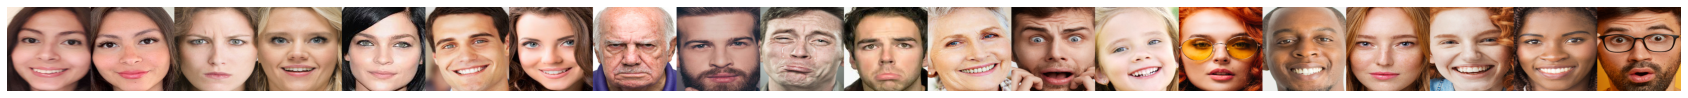

In [ ]:
plt.figure(figsize=(30, 20))
plt.imshow(np.hstack(images_list) )
plt.axis('off');

In [ ]:
pred_my_model_text

['happy woman of 35-45 years with brown Hair ',
 'happy woman of 35-45 years with brown Hair ',
 'neutral woman of 35-45 years with blond Hair ',
 'happy woman of 35-45 years with blond Hair ',
 'neutral woman of 35-45 years with black Hair ',
 'happy man of 20-35 years with black Hair ',
 'happy woman of 20-35 years with brown Hair ',
 'neutral bald man of 45-55 years with gray Hair ',
 'neutral man of 35-45 years with brown Hair ',
 'neutral man of 20-35 years with gray Hair ',
 'neutral man of 20-35 years with black Hair ',
 'happy woman of 35-45 years with blond Hair ',
 'neutral man of 35-45 years with blond Hair ',
 'happy woman of 35-45 years with blond Hair ',
 'angry bald man of 45-55 years with blond Hair with eyeglasses ',
 'happy bald man of 35-45 years with gray Hair ',
 'neutral woman of 20-35 years with blond Hair ',
 'happy woman of 35-45 years with blond Hair ',
 'happy woman of 35-45 years with brown Hair ',
 'neutral bald man of 35-45 years with black Hair with eyegl

In [ ]:
# Note that our preprocessing converts to floats ranging from -1..1 !
images = image_preprocessing(images_list)
images.shape, images.min(), images.max()

((20, 224, 224, 3), -1.0, 1.0)

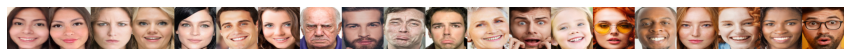

In [ ]:
plt.figure(figsize=(15, 4))
plt.imshow(np.hstack(images) * .5 + .5)
plt.axis('off');

In [ ]:
tokens = tokenizer(pred_my_model_text)
tokens.shape

(20, 16)

In [ ]:
# Embed both texts and images with a single model call.
# See next section for embedding images/texts separately.
zimg, ztxt, out = lit_model.apply(lit_variables, images=images, tokens=tokens)

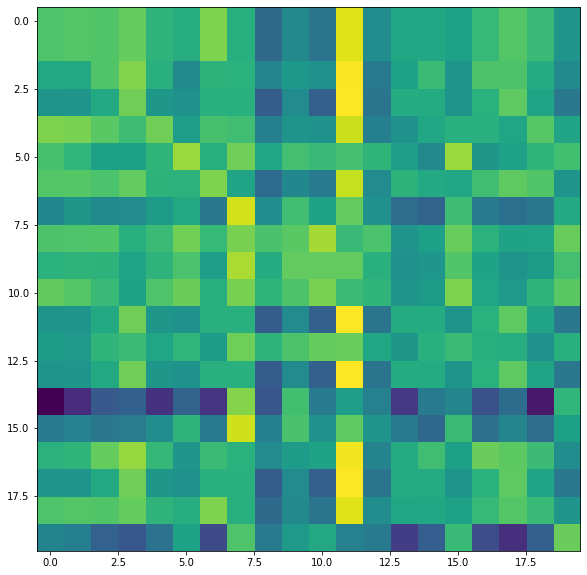

In [ ]:
figsize = (20,10)
fig = plt.figure(figsize=figsize)
plt.imshow(ztxt @ zimg.T)

In [ ]:
seen = set()
texts_preds_unique = []
conter={}
for x in pred_my_model_text:
    if x not in seen:
        texts_preds_unique.append(x)
        seen.add(x)
        conter[x] = 0
    else:
      c=conter[x]
      conter[x]=conter[x]+1
      x = x + str(c)
      texts_preds_unique.append(x)

In [ ]:
texts_preds_unique

['happy woman of 35-45 years with brown Hair ',
 'happy woman of 35-45 years with brown Hair 0',
 'neutral woman of 35-45 years with blond Hair ',
 'happy woman of 35-45 years with blond Hair ',
 'neutral woman of 35-45 years with black Hair ',
 'happy man of 20-35 years with black Hair ',
 'happy woman of 20-35 years with brown Hair ',
 'neutral bald man of 45-55 years with gray Hair ',
 'neutral man of 35-45 years with brown Hair ',
 'neutral man of 20-35 years with gray Hair ',
 'neutral man of 20-35 years with black Hair ',
 'happy woman of 35-45 years with blond Hair 0',
 'neutral man of 35-45 years with blond Hair ',
 'happy woman of 35-45 years with blond Hair 1',
 'angry bald man of 45-55 years with blond Hair with eyeglasses ',
 'happy bald man of 35-45 years with gray Hair ',
 'neutral woman of 20-35 years with blond Hair ',
 'happy woman of 35-45 years with blond Hair 2',
 'happy woman of 35-45 years with brown Hair 1',
 'neutral bald man of 35-45 years with black Hair with 

In [ ]:
tokens = tokenizer(pred_my_model_text)
zimg, ztxt, out = lit_model.apply(lit_variables, images=images, tokens=tokens)

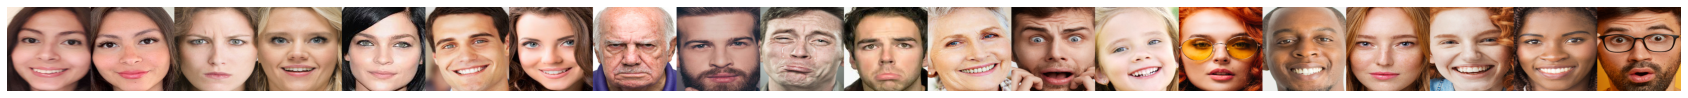

In [ ]:
probs = np.array(jax.nn.softmax(out['t'] * ztxt @ zimg.T, axis=1))
pd.set_option('colheader_justify', 'center')
plt.figure(figsize=(30, 30))
plt.imshow(np.hstack(images_list))
plt.axis('off');
df = pd.DataFrame(probs, index=texts_preds_unique).style.background_gradient('Greens', vmin=0, vmax=1).format('{:.2%}', )
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

In [ ]:
pred_my_model_text[-1]

'neutral bald man of 35-45 years with black Hair with eyeglasses '

In [ ]:
images[-len(dataset_dict_en['expression_id'].values()):].shape

(5, 224, 224, 3)

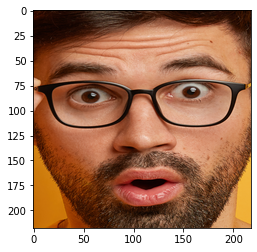

In [ ]:
plt.imshow(images_list[-1])

manual_texts=[]
for e in dataset_dict_en['expression_id'].values():
  manual_texts.append(f"{e} man of 35-45 years with black hair with eyeglasses")

manual_texts

tokens = tokenizer(manual_texts)
zimg, ztxt, out = lit_model.apply(lit_variables, images=images[-len(dataset_dict_en['expression_id'].values()):], tokens=tokens)

probs = np.array(jax.nn.softmax(out['t'] * ztxt @ zimg.T, axis=1))
df = pd.DataFrame(probs, index=manual_texts).iloc[:,4:]
df.columns = ['LiT prob output']
df = df.style.background_gradient('Greens', vmin=0, vmax=1).format('{:.2%}', )
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

In [ ]:
images[7:7+len(dataset_dict_en['expression_id'].values())].shape

(5, 224, 224, 3)

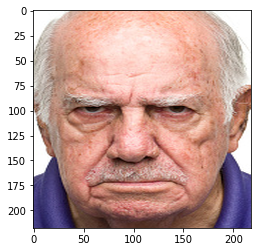

In [ ]:
plt.imshow(images_list[7])

manual_texts=[]
for e in dataset_dict_en['expression_id'].values():
  manual_texts.append(f"{e} bald man of 45-55 years with gray Hair")

manual_texts

tokens = tokenizer(manual_texts)
zimg, ztxt, out = lit_model.apply(lit_variables, images=images[7:7+len(dataset_dict_en['expression_id'].values())], tokens=tokens)

probs = np.array(jax.nn.softmax(out['t'] * ztxt @ zimg.T, axis=1))
df = pd.DataFrame(probs, index=manual_texts).iloc[:,0:1]
df.columns = ['LiT prob output']
df = df.style.background_gradient('Greens', vmin=0, vmax=1).format('{:.2%}', )
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

(-0.5, 1119.5, 223.5, -0.5)

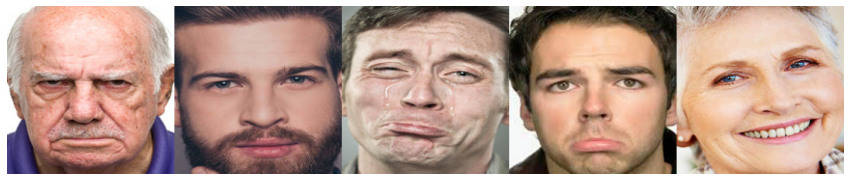

In [ ]:

plt.figure(figsize=(15, 4))
plt.imshow(np.hstack(images[7:7+len(dataset_dict_en['expression_id'].values())]) * .5 + .5)
plt.axis('off')

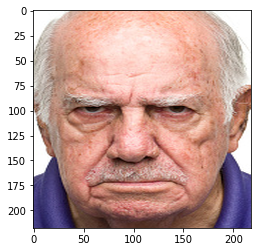

In [ ]:
plt.imshow(images_list[7])

manual_texts=[]
for e in dataset_dict_en['expression_id'].values():
  manual_texts.append(f"{e} man")

manual_texts

tokens = tokenizer(manual_texts)
zimg, ztxt, out = lit_model.apply(lit_variables, images=images[7:7+len(dataset_dict_en['expression_id'].values())], tokens=tokens)

probs = np.array(jax.nn.softmax(out['t'] * ztxt @ zimg.T, axis=1))
df = pd.DataFrame(probs, index=manual_texts).iloc[:,0:1]
df.columns = ['LiT prob output']
df = df.style.background_gradient('Greens', vmin=0, vmax=1).format('{:.2%}', )
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

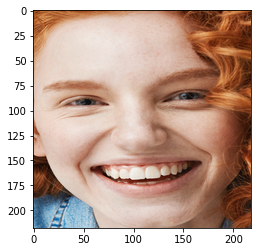

In [ ]:
plt.imshow(images_list[-3])

manual_texts=[]
for e in dataset_dict_en['hair_id'].values():
  manual_texts.append(f"happy woman of 35-45 years with {e}")

manual_texts

tokens = tokenizer(manual_texts)
zimg, ztxt, out = lit_model.apply(lit_variables, images=images[-len(dataset_dict_en['expression_id'].values()):], tokens=tokens)

probs = np.array(jax.nn.softmax(out['t'] * ztxt @ zimg.T, axis=1))
df = pd.DataFrame(probs, index=manual_texts).iloc[:,2:3]
df.columns = ['LiT prob output']
df = df.style.background_gradient('Greens', vmin=0, vmax=1).format('{:.2%}', )
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

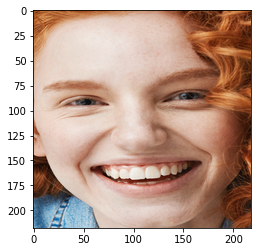

In [ ]:
plt.imshow(images_list[-3])

manual_texts=[]
for e in dataset_dict_en['hair_id'].values():
  manual_texts.append(f"happy woman with {e}")
manual_texts.append(f"happy woman with red hair")
manual_texts

tokens = tokenizer(manual_texts)
zimg, ztxt, out = lit_model.apply(lit_variables, images=images[-len(dataset_dict_en['expression_id'].values()):], tokens=tokens)

probs = np.array(jax.nn.softmax(out['t'] * ztxt @ zimg.T, axis=1))
df = pd.DataFrame(probs, index=manual_texts).iloc[:,2:3]
df.columns = ['LiT prob output']
df = df.style.background_gradient('Greens', vmin=0, vmax=1).format('{:.2%}', )
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

In [ ]:
plt.imshow(images_list[-3])

manual_texts=[]
for e in dataset_dict_en['bald_id'].values():
  manual_texts.append(f"happy woman of 35-45 years with {e}")

manual_texts

tokens = tokenizer(manual_texts)
zimg, ztxt, out = lit_model.apply(lit_variables, images=images[-len(dataset_dict_en['expression_id'].values()):], tokens=tokens)

probs = np.array(jax.nn.softmax(out['t'] * ztxt @ zimg.T, axis=1))
df = pd.DataFrame(probs, index=manual_texts).iloc[:,2:3]
df.columns = ['LiT prob output']
df = df.style.background_gradient('Greens', vmin=0, vmax=1).format('{:.2%}', )
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

In [ ]:
# Note that our preprocessing converts to floats ranging from -1..1 !
images = image_preprocessing(images_list)
images.shape, images.min(), images.max()

((5, 224, 224, 3), -1.0, 1.0)

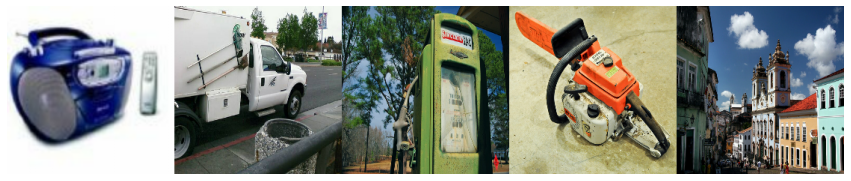

In [ ]:
plt.figure(figsize=(15, 4))
plt.imshow(np.hstack(images) * .5 + .5)
plt.axis('off');

In [ ]:
texts = [
    'itap of a cd player',
    'a photo of a truck',
    'gas station',
    'chainsaw',
    'a bad photo of colorful houses',
]
tokens = tokenizer(texts)
tokens.shape

(5, 16)

In [ ]:
# Embed both texts and images with a single model call.
# See next section for embedding images/texts separately.
zimg, ztxt, out = lit_model.apply(lit_variables, images=images, tokens=tokens)

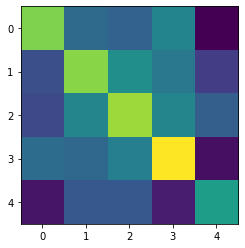

In [ ]:
plt.imshow(ztxt @ zimg.T)

In [ ]:
probs = np.array(jax.nn.softmax(out['t'] * ztxt @ zimg.T, axis=1))
pd.DataFrame(probs, index=texts).style.background_gradient('Greens', vmin=0, vmax=1).format('{:.2%}')

## `tfds` zero-shot evaluation

In [ ]:
#@markdown `imagenet_classnames`
# From https://github.com/openai/CLIP/blob/main/notebooks/Prompt_Engineering_for_ImageNet.ipynb
imagenet_classnames = "tench;goldfish;great white shark;tiger shark;hammerhead shark;electric ray;stingray;rooster;hen;ostrich;brambling;goldfinch;house finch;junco;indigo bunting;American robin;bulbul;jay;magpie;chickadee;American dipper;kite (bird of prey);bald eagle;vulture;great grey owl;fire salamander;smooth newt;newt;spotted salamander;axolotl;American bullfrog;tree frog;tailed frog;loggerhead sea turtle;leatherback sea turtle;mud turtle;terrapin;box turtle;banded gecko;green iguana;Carolina anole;desert grassland whiptail lizard;agama;frilled-necked lizard;alligator lizard;Gila monster;European green lizard;chameleon;Komodo dragon;Nile crocodile;American alligator;triceratops;worm snake;ring-necked snake;eastern hog-nosed snake;smooth green snake;kingsnake;garter snake;water snake;vine snake;night snake;boa constrictor;African rock python;Indian cobra;green mamba;sea snake;Saharan horned viper;eastern diamondback rattlesnake;sidewinder rattlesnake;trilobite;harvestman;scorpion;yellow garden spider;barn spider;European garden spider;southern black widow;tarantula;wolf spider;tick;centipede;black grouse;ptarmigan;ruffed grouse;prairie grouse;peafowl;quail;partridge;african grey parrot;macaw;sulphur-crested cockatoo;lorikeet;coucal;bee eater;hornbill;hummingbird;jacamar;toucan;duck;red-breasted merganser;goose;black swan;tusker;echidna;platypus;wallaby;koala;wombat;jellyfish;sea anemone;brain coral;flatworm;nematode;conch;snail;slug;sea slug;chiton;chambered nautilus;Dungeness crab;rock crab;fiddler crab;red king crab;American lobster;spiny lobster;crayfish;hermit crab;isopod;white stork;black stork;spoonbill;flamingo;little blue heron;great egret;bittern bird;crane bird;limpkin;common gallinule;American coot;bustard;ruddy turnstone;dunlin;common redshank;dowitcher;oystercatcher;pelican;king penguin;albatross;grey whale;killer whale;dugong;sea lion;Chihuahua;Japanese Chin;Maltese;Pekingese;Shih Tzu;King Charles Spaniel;Papillon;toy terrier;Rhodesian Ridgeback;Afghan Hound;Basset Hound;Beagle;Bloodhound;Bluetick Coonhound;Black and Tan Coonhound;Treeing Walker Coonhound;English foxhound;Redbone Coonhound;borzoi;Irish Wolfhound;Italian Greyhound;Whippet;Ibizan Hound;Norwegian Elkhound;Otterhound;Saluki;Scottish Deerhound;Weimaraner;Staffordshire Bull Terrier;American Staffordshire Terrier;Bedlington Terrier;Border Terrier;Kerry Blue Terrier;Irish Terrier;Norfolk Terrier;Norwich Terrier;Yorkshire Terrier;Wire Fox Terrier;Lakeland Terrier;Sealyham Terrier;Airedale Terrier;Cairn Terrier;Australian Terrier;Dandie Dinmont Terrier;Boston Terrier;Miniature Schnauzer;Giant Schnauzer;Standard Schnauzer;Scottish Terrier;Tibetan Terrier;Australian Silky Terrier;Soft-coated Wheaten Terrier;West Highland White Terrier;Lhasa Apso;Flat-Coated Retriever;Curly-coated Retriever;Golden Retriever;Labrador Retriever;Chesapeake Bay Retriever;German Shorthaired Pointer;Vizsla;English Setter;Irish Setter;Gordon Setter;Brittany dog;Clumber Spaniel;English Springer Spaniel;Welsh Springer Spaniel;Cocker Spaniel;Sussex Spaniel;Irish Water Spaniel;Kuvasz;Schipperke;Groenendael dog;Malinois;Briard;Australian Kelpie;Komondor;Old English Sheepdog;Shetland Sheepdog;collie;Border Collie;Bouvier des Flandres dog;Rottweiler;German Shepherd Dog;Dobermann;Miniature Pinscher;Greater Swiss Mountain Dog;Bernese Mountain Dog;Appenzeller Sennenhund;Entlebucher Sennenhund;Boxer;Bullmastiff;Tibetan Mastiff;French Bulldog;Great Dane;St. Bernard;husky;Alaskan Malamute;Siberian Husky;Dalmatian;Affenpinscher;Basenji;pug;Leonberger;Newfoundland dog;Great Pyrenees dog;Samoyed;Pomeranian;Chow Chow;Keeshond;brussels griffon;Pembroke Welsh Corgi;Cardigan Welsh Corgi;Toy Poodle;Miniature Poodle;Standard Poodle;Mexican hairless dog (xoloitzcuintli);grey wolf;Alaskan tundra wolf;red wolf or maned wolf;coyote;dingo;dhole;African wild dog;hyena;red fox;kit fox;Arctic fox;grey fox;tabby cat;tiger cat;Persian cat;Siamese cat;Egyptian Mau;cougar;lynx;leopard;snow leopard;jaguar;lion;tiger;cheetah;brown bear;American black bear;polar bear;sloth bear;mongoose;meerkat;tiger beetle;ladybug;ground beetle;longhorn beetle;leaf beetle;dung beetle;rhinoceros beetle;weevil;fly;bee;ant;grasshopper;cricket insect;stick insect;cockroach;praying mantis;cicada;leafhopper;lacewing;dragonfly;damselfly;red admiral butterfly;ringlet butterfly;monarch butterfly;small white butterfly;sulphur butterfly;gossamer-winged butterfly;starfish;sea urchin;sea cucumber;cottontail rabbit;hare;Angora rabbit;hamster;porcupine;fox squirrel;marmot;beaver;guinea pig;common sorrel horse;zebra;pig;wild boar;warthog;hippopotamus;ox;water buffalo;bison;ram (adult male sheep);bighorn sheep;Alpine ibex;hartebeest;impala (antelope);gazelle;arabian camel;llama;weasel;mink;European polecat;black-footed ferret;otter;skunk;badger;armadillo;three-toed sloth;orangutan;gorilla;chimpanzee;gibbon;siamang;guenon;patas monkey;baboon;macaque;langur;black-and-white colobus;proboscis monkey;marmoset;white-headed capuchin;howler monkey;titi monkey;Geoffroy's spider monkey;common squirrel monkey;ring-tailed lemur;indri;Asian elephant;African bush elephant;red panda;giant panda;snoek fish;eel;silver salmon;rock beauty fish;clownfish;sturgeon;gar fish;lionfish;pufferfish;abacus;abaya;academic gown;accordion;acoustic guitar;aircraft carrier;airliner;airship;altar;ambulance;amphibious vehicle;analog clock;apiary;apron;trash can;assault rifle;backpack;bakery;balance beam;balloon;ballpoint pen;Band-Aid;banjo;baluster / handrail;barbell;barber chair;barbershop;barn;barometer;barrel;wheelbarrow;baseball;basketball;bassinet;bassoon;swimming cap;bath towel;bathtub;station wagon;lighthouse;beaker;military hat (bearskin or shako);beer bottle;beer glass;bell tower;baby bib;tandem bicycle;bikini;ring binder;binoculars;birdhouse;boathouse;bobsleigh;bolo tie;poke bonnet;bookcase;bookstore;bottle cap;hunting bow;bow tie;brass memorial plaque;bra;breakwater;breastplate;broom;bucket;buckle;bulletproof vest;high-speed train;butcher shop;taxicab;cauldron;candle;cannon;canoe;can opener;cardigan;car mirror;carousel;tool kit;cardboard box / carton;car wheel;automated teller machine;cassette;cassette player;castle;catamaran;CD player;cello;mobile phone;chain;chain-link fence;chain mail;chainsaw;storage chest;chiffonier;bell or wind chime;china cabinet;Christmas stocking;church;movie theater;cleaver;cliff dwelling;cloak;clogs;cocktail shaker;coffee mug;coffeemaker;spiral or coil;combination lock;computer keyboard;candy store;container ship;convertible;corkscrew;cornet;cowboy boot;cowboy hat;cradle;construction crane;crash helmet;crate;infant bed;Crock Pot;croquet ball;crutch;cuirass;dam;desk;desktop computer;rotary dial telephone;diaper;digital clock;digital watch;dining table;dishcloth;dishwasher;disc brake;dock;dog sled;dome;doormat;drilling rig;drum;drumstick;dumbbell;Dutch oven;electric fan;electric guitar;electric locomotive;entertainment center;envelope;espresso machine;face powder;feather boa;filing cabinet;fireboat;fire truck;fire screen;flagpole;flute;folding chair;football helmet;forklift;fountain;fountain pen;four-poster bed;freight car;French horn;frying pan;fur coat;garbage truck;gas mask or respirator;gas pump;goblet;go-kart;golf ball;golf cart;gondola;gong;gown;grand piano;greenhouse;radiator grille;grocery store;guillotine;hair clip;hair spray;half-track;hammer;hamper;hair dryer;hand-held computer;handkerchief;hard disk drive;harmonica;harp;combine harvester;hatchet;holster;home theater;honeycomb;hook;hoop skirt;gymnastic horizontal bar;horse-drawn vehicle;hourglass;iPod;clothes iron;carved pumpkin;jeans;jeep;T-shirt;jigsaw puzzle;rickshaw;joystick;kimono;knee pad;knot;lab coat;ladle;lampshade;laptop computer;lawn mower;lens cap;letter opener;library;lifeboat;lighter;limousine;ocean liner;lipstick;slip-on shoe;lotion;music speaker;loupe magnifying glass;sawmill;magnetic compass;messenger bag;mailbox;tights;one-piece bathing suit;manhole cover;maraca;marimba;mask;matchstick;maypole;maze;measuring cup;medicine cabinet;megalith;microphone;microwave oven;military uniform;milk can;minibus;miniskirt;minivan;missile;mitten;mixing bowl;mobile home;ford model t;modem;monastery;monitor;moped;mortar and pestle;graduation cap;mosque;mosquito net;vespa;mountain bike;tent;computer mouse;mousetrap;moving van;muzzle;metal nail;neck brace;necklace;baby pacifier;notebook computer;obelisk;oboe;ocarina;odometer;oil filter;pipe organ;oscilloscope;overskirt;bullock cart;oxygen mask;product packet / packaging;paddle;paddle wheel;padlock;paintbrush;pajamas;palace;pan flute;paper towel;parachute;parallel bars;park bench;parking meter;railroad car;patio;payphone;pedestal;pencil case;pencil sharpener;perfume;Petri dish;photocopier;plectrum;Pickelhaube;picket fence;pickup truck;pier;piggy bank;pill bottle;pillow;ping-pong ball;pinwheel;pirate ship;drink pitcher;block plane;planetarium;plastic bag;plate rack;farm plow;plunger;Polaroid camera;pole;police van;poncho;pool table;soda bottle;plant pot;potter's wheel;power drill;prayer rug;printer;prison;missile;projector;hockey puck;punching bag;purse;quill;quilt;race car;racket;radiator;radio;radio telescope;rain barrel;recreational vehicle;fishing casting reel;reflex camera;refrigerator;remote control;restaurant;revolver;rifle;rocking chair;rotisserie;eraser;rugby ball;ruler measuring stick;sneaker;safe;safety pin;salt shaker;sandal;sarong;saxophone;scabbard;weighing scale;school bus;schooner;scoreboard;CRT monitor;screw;screwdriver;seat belt;sewing machine;shield;shoe store;shoji screen / room divider;shopping basket;shopping cart;shovel;shower cap;shower curtain;ski;balaclava ski mask;sleeping bag;slide rule;sliding door;slot machine;snorkel;snowmobile;snowplow;soap dispenser;soccer ball;sock;solar thermal collector;sombrero;soup bowl;keyboard space bar;space heater;space shuttle;spatula;motorboat;spider web;spindle;sports car;spotlight;stage;steam locomotive;through arch bridge;steel drum;stethoscope;scarf;stone wall;stopwatch;stove;strainer;tram;stretcher;couch;stupa;submarine;suit;sundial;sunglasses;sunglasses;sunscreen;suspension bridge;mop;sweatshirt;swim trunks / shorts;swing;electrical switch;syringe;table lamp;tank;tape player;teapot;teddy bear;television;tennis ball;thatched roof;front curtain;thimble;threshing machine;throne;tile roof;toaster;tobacco shop;toilet seat;torch;totem pole;tow truck;toy store;tractor;semi-trailer truck;tray;trench coat;tricycle;trimaran;tripod;triumphal arch;trolleybus;trombone;hot tub;turnstile;typewriter keyboard;umbrella;unicycle;upright piano;vacuum cleaner;vase;vaulted or arched ceiling;velvet fabric;vending machine;vestment;viaduct;violin;volleyball;waffle iron;wall clock;wallet;wardrobe;military aircraft;sink;washing machine;water bottle;water jug;water tower;whiskey jug;whistle;hair wig;window screen;window shade;Windsor tie;wine bottle;airplane wing;wok;wooden spoon;wool;split-rail fence;shipwreck;sailboat;yurt;website;comic book;crossword;traffic or street sign;traffic light;dust jacket;menu;plate;guacamole;consomme;hot pot;trifle;ice cream;popsicle;baguette;bagel;pretzel;cheeseburger;hot dog;mashed potatoes;cabbage;broccoli;cauliflower;zucchini;spaghetti squash;acorn squash;butternut squash;cucumber;artichoke;bell pepper;cardoon;mushroom;Granny Smith apple;strawberry;orange;lemon;fig;pineapple;banana;jackfruit;cherimoya (custard apple);pomegranate;hay;carbonara;chocolate syrup;dough;meatloaf;pizza;pot pie;burrito;red wine;espresso;tea cup;eggnog;mountain;bubble;cliff;coral reef;geyser;lakeshore;promontory;sandbar;beach;valley;volcano;baseball player;bridegroom;scuba diver;rapeseed;daisy;yellow lady's slipper;corn;acorn;rose hip;horse chestnut seed;coral fungus;agaric;gyromitra;stinkhorn mushroom;earth star fungus;hen of the woods mushroom;bolete;corn cob;toilet paper".split(';')


In [ ]:
# # For imagenet evaluation, first prepare the dataset on a GCS bucket as
# # described in
# # https://www.tensorflow.org/datasets/catalog/imagenet2012
# # and then replace `data_dir` below with that GCS bucket.
# from google.colab import auth
# auth.authenticate_user()  # Required to access access protected GCS buckets.
# builder = tfds.builder('imagenet2012', data_dir='gs://tensorflow-datasets/datasets')
# ds_test = builder.as_dataset('validation')
# info = builder.info
# classnames = imagenet_classnames

In [ ]:
# Load dataset and create array of class names.
builder = tfds.builder('cifar100')
builder.download_and_prepare()
ds_test = builder.as_dataset('test')
info = builder.info
classnames = [
    info.features['label'].int2str(id_)
    for id_ in range(info.features['label'].num_classes)
]
classnames[:10]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar100/3.0.2.incompleteSIB63P/cifar100-train.tfrecord*...:   0%|          | …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar100/3.0.2.incompleteSIB63P/cifar100-test.tfrecord*...:   0%|          | 0…

Dataset cifar100 downloaded and prepared to ~/tensorflow_datasets/cifar100/3.0.2. Subsequent calls will reuse this data.


['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

In [ ]:
#@markdown `PROMPTS80`
PROMPTS80 = [
    'a bad photo of a {}.',
    'a photo of many {}.',
    'a sculpture of a {}.',
    'a photo of the hard to see {}.',
    'a low resolution photo of the {}.',
    'a rendering of a {}.',
    'graffiti of a {}.',
    'a bad photo of the {}.',
    'a cropped photo of the {}.',
    'a tattoo of a {}.',
    'the embroidered {}.',
    'a photo of a hard to see {}.',
    'a bright photo of a {}.',
    'a photo of a clean {}.',
    'a photo of a dirty {}.',
    'a dark photo of the {}.',
    'a drawing of a {}.',
    'a photo of my {}.',
    'the plastic {}.',
    'a photo of the cool {}.',
    'a close-up photo of a {}.',
    'a black and white photo of the {}.',
    'a painting of the {}.',
    'a painting of a {}.',
    'a pixelated photo of the {}.',
    'a sculpture of the {}.',
    'a bright photo of the {}.',
    'a cropped photo of a {}.',
    'a plastic {}.',
    'a photo of the dirty {}.',
    'a jpeg corrupted photo of a {}.',
    'a blurry photo of the {}.',
    'a photo of the {}.',
    'a good photo of the {}.',
    'a rendering of the {}.',
    'a {} in a video game.',
    'a photo of one {}.',
    'a doodle of a {}.',
    'a close-up photo of the {}.',
    'a photo of a {}.',
    'the origami {}.',
    'the {} in a video game.',
    'a sketch of a {}.',
    'a doodle of the {}.',
    'a origami {}.',
    'a low resolution photo of a {}.',
    'the toy {}.',
    'a rendition of the {}.',
    'a photo of the clean {}.',
    'a photo of a large {}.',
    'a rendition of a {}.',
    'a photo of a nice {}.',
    'a photo of a weird {}.',
    'a blurry photo of a {}.',
    'a cartoon {}.',
    'art of a {}.',
    'a sketch of the {}.',
    'a embroidered {}.',
    'a pixelated photo of a {}.',
    'itap of the {}.',
    'a jpeg corrupted photo of the {}.',
    'a good photo of a {}.',
    'a plushie {}.',
    'a photo of the nice {}.',
    'a photo of the small {}.',
    'a photo of the weird {}.',
    'the cartoon {}.',
    'art of the {}.',
    'a drawing of the {}.',
    'a photo of the large {}.',
    'a black and white photo of a {}.',
    'the plushie {}.',
    'a dark photo of a {}.',
    'itap of a {}.',
    'graffiti of the {}.',
    'a toy {}.',
    'itap of my {}.',
    'a photo of a cool {}.',
    'a photo of a small {}.',
    'a tattoo of the {}.',
]


In [ ]:
# The official CLIP Colab
# https://github.com/openai/CLIP/blob/main/notebooks/Prompt_Engineering_for_ImageNet.ipynb
# lists two sets of prompts: the 80 prompts mentioned in the CLIP paper
# (https://arxiv.org/abs/2103.00020), as well as a shortlist of 7 prompts that
# we'll be using by default below.

PROMPTS = [
    'itap of a {}.',
    'a bad photo of the {}.',
    'a origami {}.',
    'a photo of the large {}.',
    'a {} in a video game.',
    'art of the {}.',
    'a photo of the small {}.',
    '{}',
]
# PROMPTS = PROMPTS80

texts = [
    prompt.format(classname)
    for classname in classnames
    for prompt in PROMPTS
]
len(texts)

800

In [ ]:
# Tokenize the texts using numpy like before.
tokens = tokenizer(texts)
tokens.shape

(800, 16)

In [ ]:
_, ztxt, _ = lit_model.apply(lit_variables, tokens=tokens)
ztxt.shape

(800, 768)

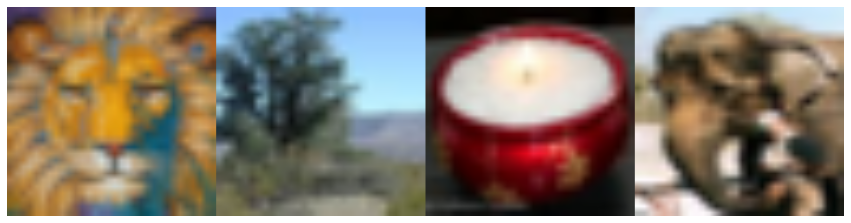

In [ ]:
# `pp` from above (section "Load model") is a TensorFlow graph that can
# efficiently be added to the input pre-processing.
imgs = next(iter(ds_test.map(pp).batch(4)))['image']
# Note that `pp` would also tokenize "texts" to "tokens", if such a feature was
# present in the dataset (which is not the case for cifar).

plt.figure(figsize=(15, 4))
plt.imshow(np.hstack(imgs) * .5 + .5)
plt.axis('off');

In [ ]:
# JIT-compile image embedding function because there are lots of images.
@jax.jit
def embed_images(variables, images):
  zimg, _, _ = lit_model.apply(variables, images=images)
  return zimg

In [ ]:
# Compute all images embeddings & collect correct labels.
zimgs = []
labels = []

for batch in tqdm.tqdm(ds_test.map(lit_model.get_pp()).batch(500)):
  labels += list(batch['label'].numpy())
  zimg = embed_images(lit_variables, batch['image'].numpy())
  zimgs.append(np.array(zimg))
zimgs = np.concatenate(zimgs)
zimgs.shape

100%|██████████| 20/20 [02:29<00:00,  7.49s/it]


(10000, 768)

In [ ]:
# Compute similarities ...
sims = zimgs @ ztxt.reshape([len(classnames), len(PROMPTS), -1]).mean(axis=1).T
sims.shape

(10000, 100)